# Reconocimiento Dígitos DB MINST

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importación de los datos

In [78]:
from keras.datasets import mnist

In [80]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Exploracion de los datos

In [83]:
print(X_train[0].shape)

(28, 28)


In [85]:
y_train[0]

5

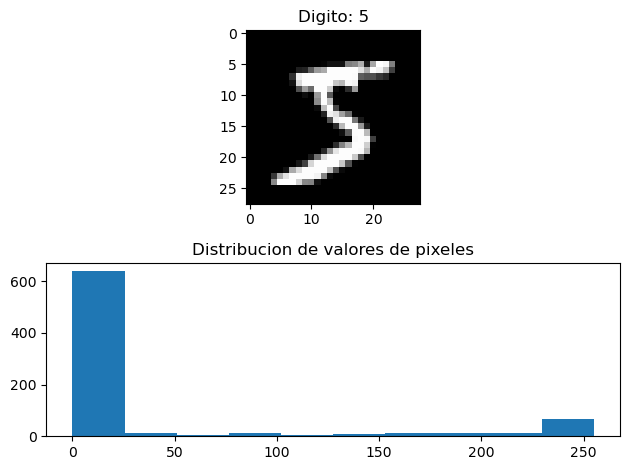

In [87]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digito: {}".format(y_train[0]))
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Distribucion de valores de pixeles")
plt.tight_layout()
plt.show()

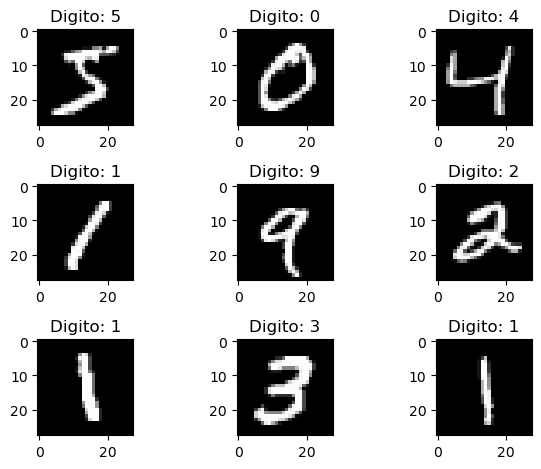

In [89]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digito: {}".format(y_train[i]))

#### Preprocesamiento

Primero aplanamos las imágenes, es decir, de una matriz 28x28 las llevamos a un vector de 784

In [93]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [95]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [97]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Ahora escalamos los datos, como los valores van de 0 a 255, basta solamente con dividir por 255

In [100]:
X_train = X_train / 255
X_test = X_test / 255

#### Seguimos con la transformación de la respuesta, se debe llevar a un vector

In [103]:
from tensorflow.keras import utils as np_utils

In [105]:
# vectores de respuesta
# [0,0,0,0,1,0,0,0,0,0] -> 4

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [107]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

#### Diseño de la Arquitectura de la Red

- Input vector (784 nodos)
- Layer 1 (512 nodos)
- Layer 2 (512 nodos)
- Output Layer (10 categorías)

In [110]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Input

In [112]:
model = Sequential()

# 1. Definimos la entrada de forma moderna
model.add(Input(shape=(784,))) 

# 2. Primera capa densa
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) # Aplicar Dropout

# 3. Segunda capa densa
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# 4. Capa de salida
model.add(Dense(10, activation='softmax'))

# Ver resumen
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamiento del Modelo

In [119]:
model.fit(X_train, Y_train, epochs=20, batch_size=128, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 5s - 11ms/step - accuracy: 0.9254 - loss: 0.2472 - val_accuracy: 0.9669 - val_loss: 0.1076
Epoch 2/20
469/469 - 4s - 8ms/step - accuracy: 0.9692 - loss: 0.1012 - val_accuracy: 0.9752 - val_loss: 0.0841
Epoch 3/20
469/469 - 4s - 8ms/step - accuracy: 0.9777 - loss: 0.0704 - val_accuracy: 0.9775 - val_loss: 0.0733
Epoch 4/20
469/469 - 4s - 9ms/step - accuracy: 0.9820 - loss: 0.0560 - val_accuracy: 0.9788 - val_loss: 0.0749
Epoch 5/20
469/469 - 4s - 8ms/step - accuracy: 0.9844 - loss: 0.0479 - val_accuracy: 0.9795 - val_loss: 0.0697
Epoch 6/20
469/469 - 4s - 8ms/step - accuracy: 0.9867 - loss: 0.0399 - val_accuracy: 0.9812 - val_loss: 0.0625
Epoch 7/20
469/469 - 4s - 8ms/step - accuracy: 0.9892 - loss: 0.0316 - val_accuracy: 0.9813 - val_loss: 0.0665
Epoch 8/20
469/469 - 4s - 8ms/step - accuracy: 0.9899 - loss: 0.0306 - val_accuracy: 0.9819 - val_loss: 0.0661
Epoch 9/20
469/469 - 5s - 11ms/step - accuracy: 0.9905 - loss: 0.0286 - val_accuracy: 0.9803 - val_loss: 0.0695

#### Métricas de Evaluación

In [126]:
from sklearn.metrics import accuracy_score

In [128]:
# 1. Obtener las predicciones del modelo
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# 2. ELIMINA el argmax para y_test si ya es unidimensional
# Simplemente renombramos para mantener el orden de tu script
y_test_classes = y_test 

# 3. Imprimir el accuracy
print(f"Accuracy Score: {accuracy_score(y_test_classes, predicted_classes)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy Score: 0.981


In [130]:
accuracy_score(predicted_classes, y_test)

0.981

#### Explorando predicciones fallidas

Ahora vizualizaremos algunos de las predicciones que el algoritmo no fue capaz de predecir correctamente.

In [133]:
incorrectos_idx = np.nonzero(predicted_classes != y_test)[0]

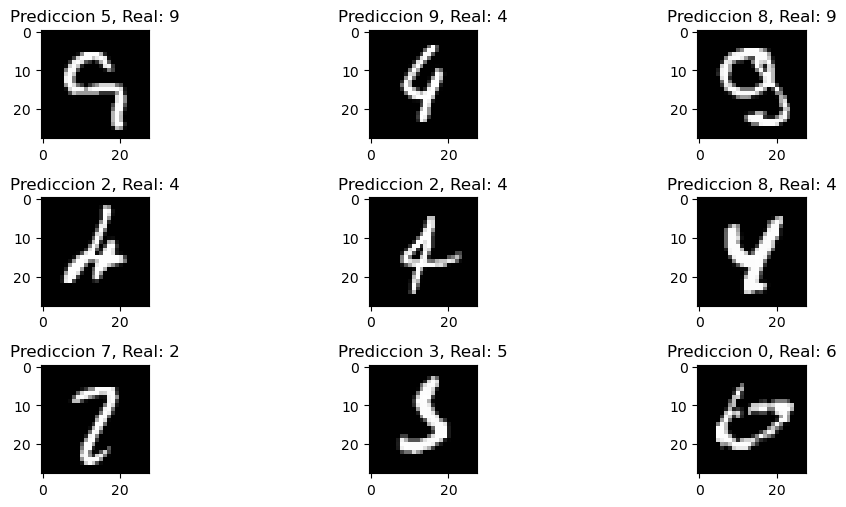

In [135]:
fig = plt.figure(figsize=(10,10))
for i, incorrecto in enumerate(incorrectos_idx[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrecto].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Prediccion {}, Real: {}".format(predicted_classes[incorrecto], y_test[incorrecto]))
plt.tight_layout()